In [2]:
%matplotlib inline

In [3]:
import os
import json
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import wandb

In [4]:
X_LIM = (0, 150)
Y_LIM = (0, 1200)
ERROR_BAR = 'se'
SMOOTH = 10
WANDB_ENTITY = 'odiamond18'

In [5]:
# Get data for my code
api = wandb.Api()
run_dfs = []
i = 0

runs = api.runs(WANDB_ENTITY + '/' + 'og_aux_task_codebase')
for run in runs:
    if run.config['exp_id'] == "dqn_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'DQN'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "hallway_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'hallway'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "corner_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'corner'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

if len(run_dfs) != 90:
    print('warning total epiodes is not 90')

run_0
run_1
run_2
run_3
run_4
run_5
run_6
run_7
run_8
run_9
run_10
run_11
run_12
run_13
run_14
run_15
run_16
run_17
run_18
run_19
run_20
run_21
run_22
run_23
run_24
run_25
run_26
run_27
run_28
run_29
run_30
run_31
run_32
run_33
run_34
run_35
run_36
run_37
run_38
run_39
run_40
run_41
run_42
run_43
run_44
run_45
run_46
run_47
run_48
run_49
run_50
run_51
run_52
run_53
run_54
run_55
run_56
run_57
run_58
run_59
run_60
run_61
run_62
run_63
run_64
run_65
run_66
run_67
run_68
run_69
run_70
run_71
run_72
run_73
run_74
run_75
run_76
run_77
run_78
run_79
run_80
run_81
run_82
run_83
run_84
run_85
run_86
run_87
run_88
run_89


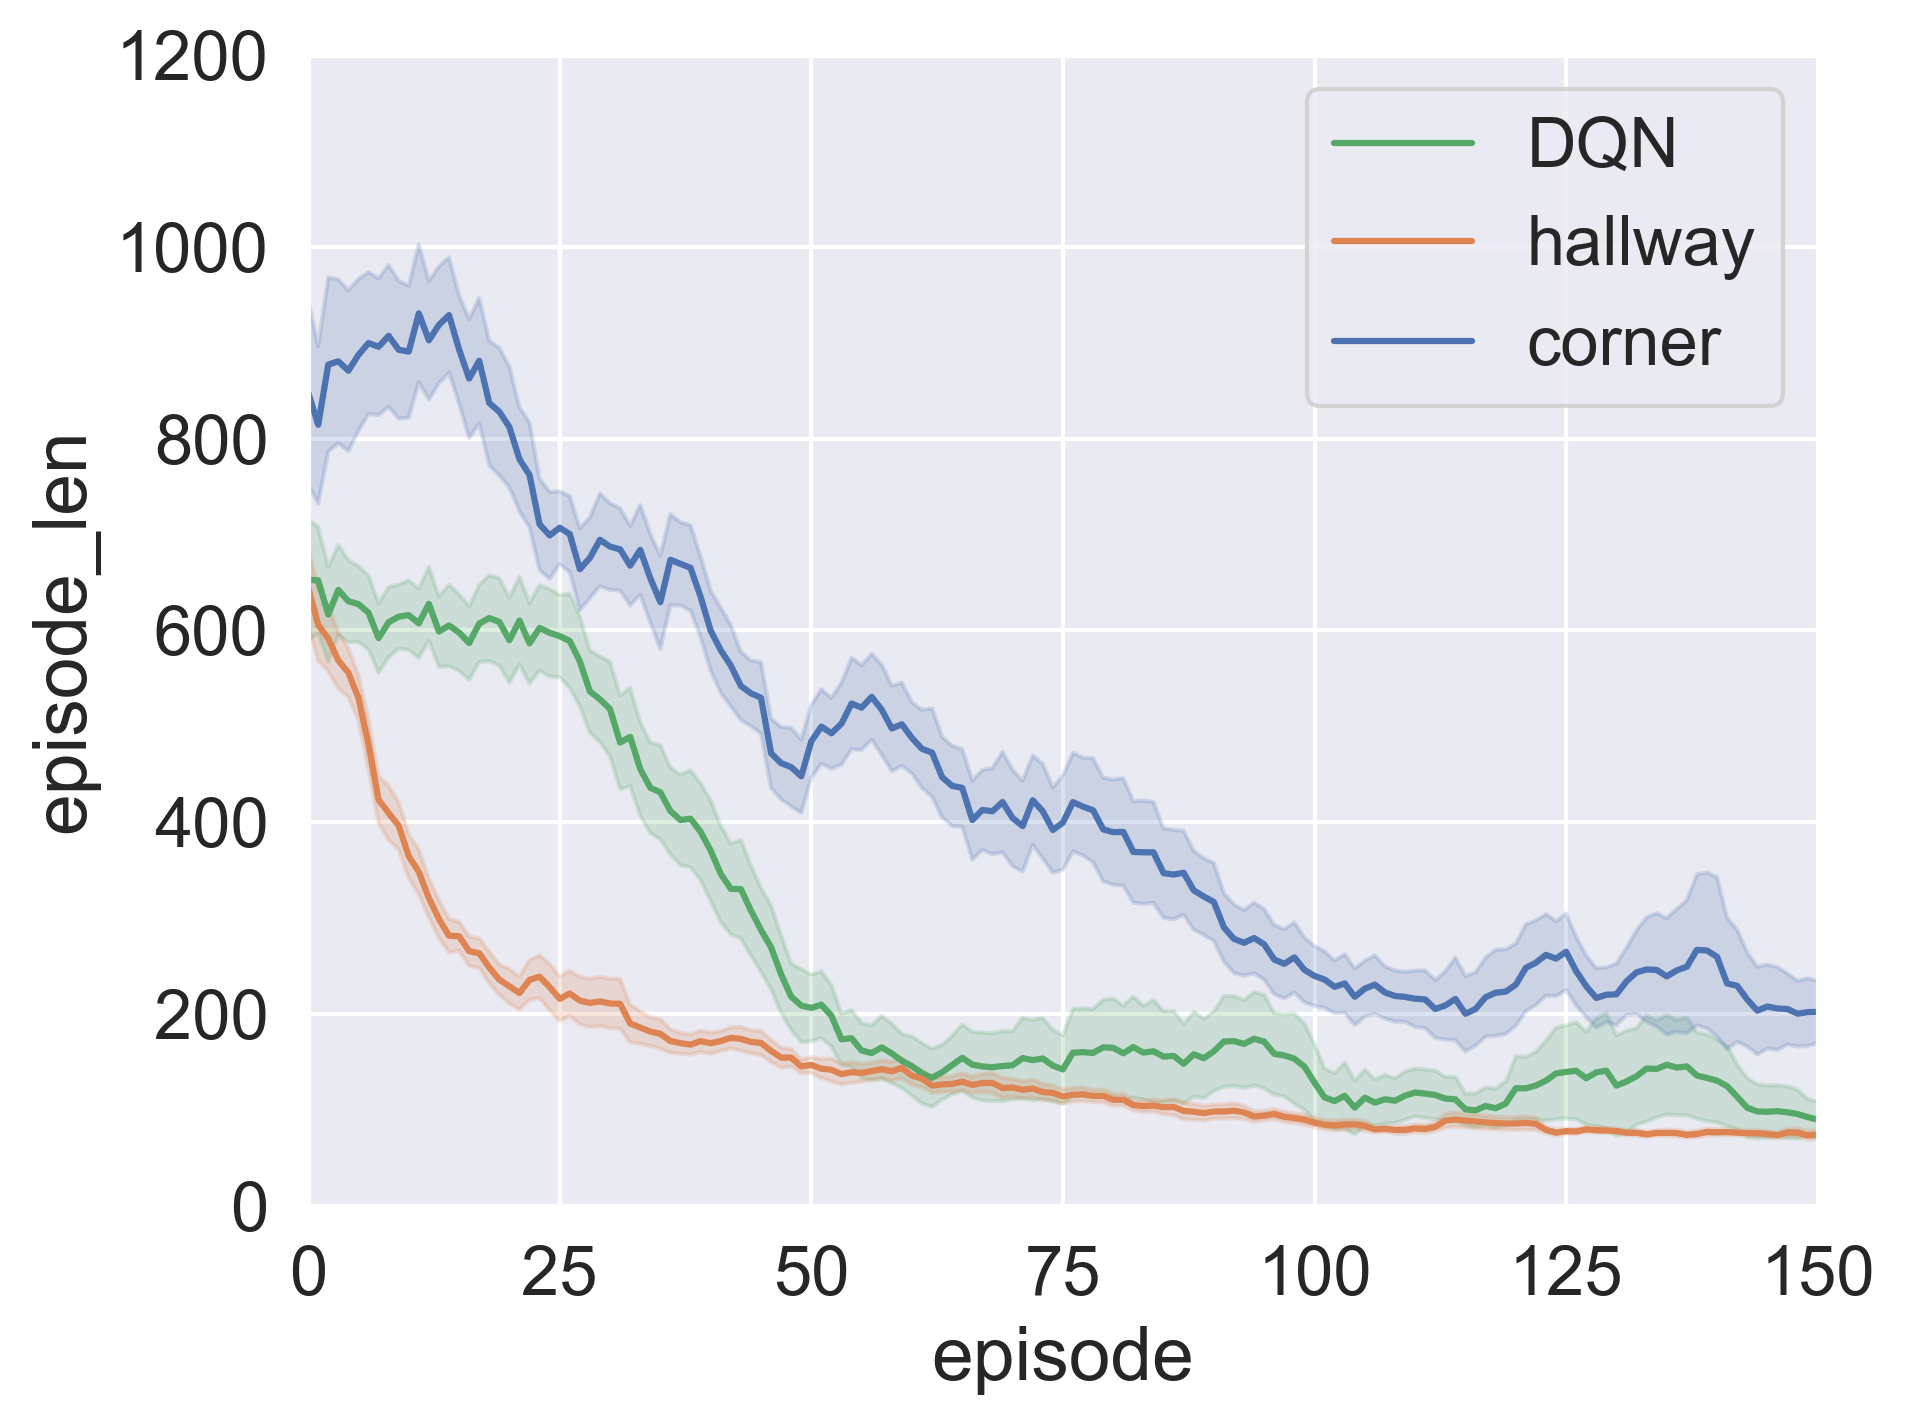

In [7]:
new_dfs = copy.deepcopy(run_dfs)
for df in new_dfs:
    df['episode_len'] = df['episode_len'].rolling(window=SMOOTH, min_periods=1, center=True).mean()
stacked_df = pd.concat(new_dfs, axis=0, ignore_index=True)
# Plot learning curves for each level of the condition, averaging y values for each timestep across runs with the same level
sns.set_theme(style="darkgrid", font_scale=1.5, rc={"figure.dpi":300, 'savefig.dpi':300})
sns.lineplot(x='episode', 
             y='episode_len', 
             hue='algo', 
             palette={
                 'corner': '#4c72b0', 
                 'hallway': '#dd8452',
                 'DQN': '#55a868',
                 },
             data=stacked_df, 
             errorbar=ERROR_BAR)
plt.xlim(*X_LIM)
plt.ylim(*Y_LIM)
plt.legend(loc='best').set_draggable(True)

plt.tight_layout(pad=0.5)
plt.show()